# 时间序列统计分析

参考链接：
- https://blog.csdn.net/qq_41103204/article/details/105810742
- https://mp.weixin.qq.com/s/INZgM6hLSEpboaNhS22CaA

## 时间序列

时间序列是同一统计指标数值按时间先后顺序排列而成的数列，蕴含过去与未来之间的关联。

## 基础概念

### 协方差

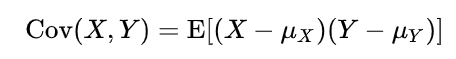

> 变量X和变量Y如何一起变动的，但变量有各自的范围，所以除以标准差进行标准化，则为下列相关系数公式

### 相关系数

考察两个变量之间的线性关系

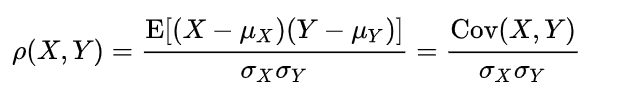

### 平衡性检验 

严平稳：数学期望和方差都固定。任何统计性质都不会随着时间改变。

弱平稳：均值恒定、方差始终存在、自协方差不随时间波动.

> 把时间段细分为更短的区间，使得在每个小区间内的时间序列尽量满足弱平稳性

#### 单位根检验

#### 时序图检验

#### 自相关性检验

检验当前数据与历史数据的关系。考察同一变量不同时刻之间的关系。

自相关性(ACF)：t时刻与距当前任意k间隔时刻的值之间的线性关系。

根据相关系数公式，可得自相关性公式：

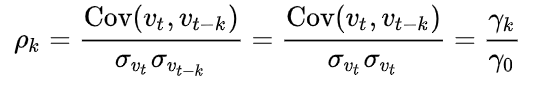

r0是vt的方差，rk是vt与vt-k的自协方差。

自相关也存在一定的问题，不仅包含Vt与Vt-k的直接关系，也包含较短滞后项Vt-1,...,Vt-k-1间接关系。

为了解决这个问题，引入了偏自相关性(PACF)。

- 使用ACF图，即使对于过去很久远的滞后项，，它也会显示出良好的相关性。

- 对PACF图来说，因为它删除了之前滞后已经解释的成分，因此我们只得到了与残差相关的滞后

### 白噪声检验

白噪声序列是不相关的，每一个点都独立的来自某个未知的分布，它们满足独立同分布。

对于一个时间序列，如果该序列的成分满足均值为0，且对于任意的k>=1自相关系数均为0，则称该时间序列为一个白噪声。

一个优秀的时序模型拟合出的残差序列应该（近似）为一个白噪声。因此，使用白噪声序列的性质可以帮助我们确认我们的残差序列中没有任何相关性了，一旦残差序列没有相关性便意味着模型是原始时间序列的一个良好的拟合。

一般都是通过构造统计量来检验。

### 随机游走

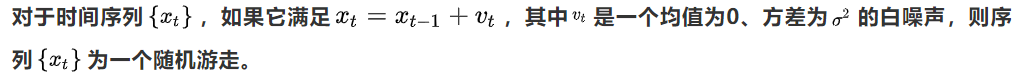

> 随机游走是一阶自回归模型。

则有：

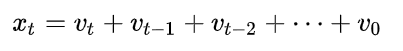

xt的均值为0，方差是t的函数。所以随机游走不是稳定的序列。随着时间的增长，波动会越来越大。

## 经典模型

### AR(自回归模型）

#### 模型介绍

当一个时间序列中，它当前的观测值可以通过历史观测值获得是，那么就是一个AR。

p阶AR模型为：

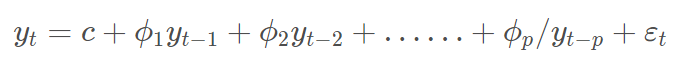

最后一项是白噪声，yt-1等是滞后项，p是滞后值。

- 自相关系数是拖尾的。
- 偏自相关系数是p阶截尾。

通过PACF 图来优化AR 过程中的特征，因为PACF 能够移除已经被先前的滞后项所解释的变化，因此我们只会得到相关的特征。

#### 代码

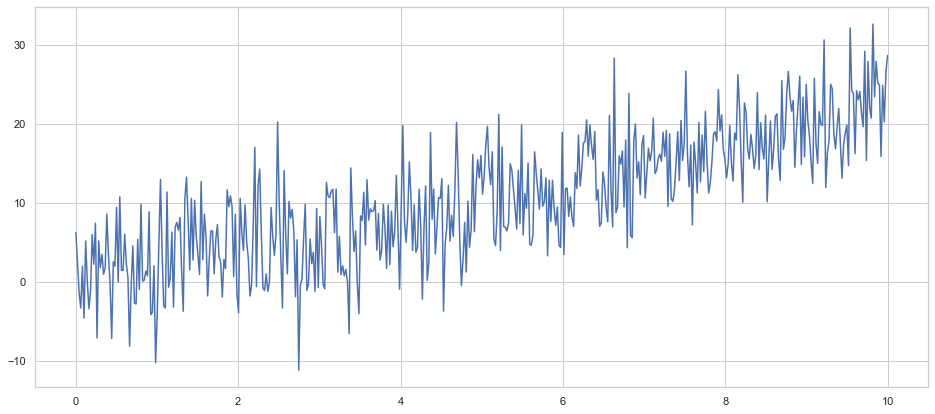

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

from statsmodels.tsa.stattools import acf, pacf

t = np.linspace(0, 10, 500)
ys = np.random.normal(0,5,500)

ye = np.exp(t**0.5)

y = ys+ye

plt.figure(figsize=(16,7))
plt.plot(t,y)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


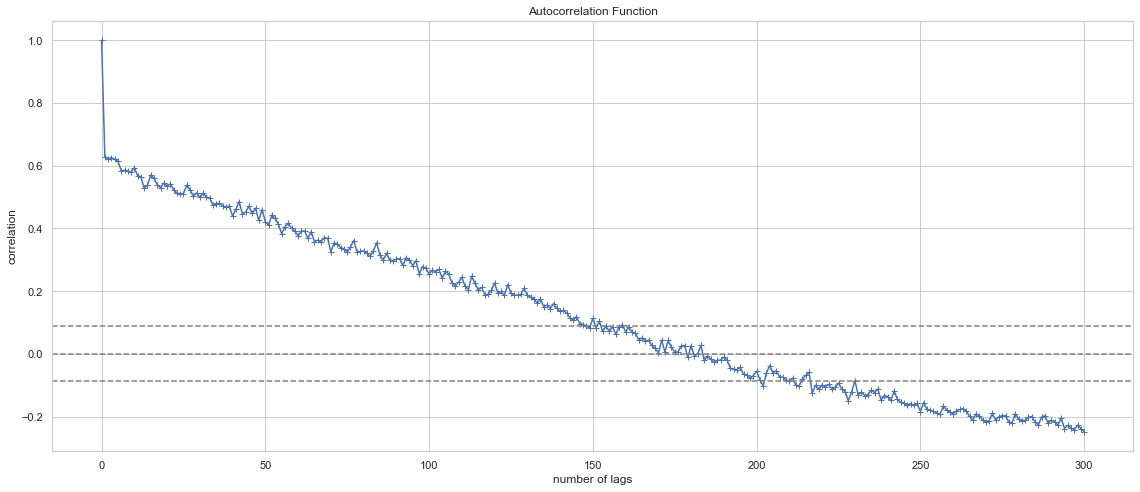

In [4]:
lag_acf = acf(y, nlags=300)
#Plot ACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_acf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray') # 下限置信区间
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray') # 上限置信区间
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

ACF 曲线在该滞后值约为150左右时首次穿过上限置信区间

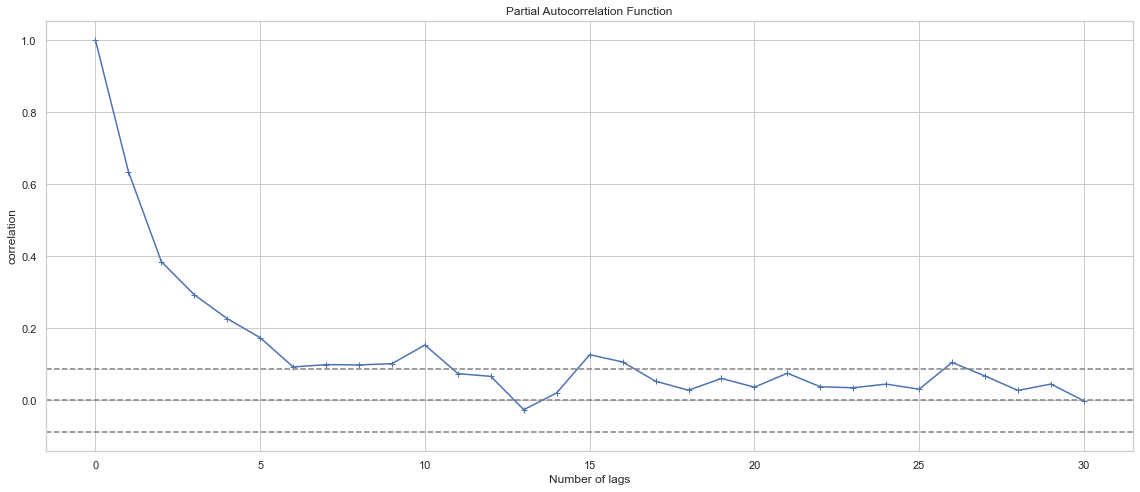

In [5]:
from statsmodels.tsa.stattools import pacf

#calling partial correlation function
lag_pacf = pacf(y, nlags=30, method='ols')
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()

### MA(滑动平均模型) 

#### 模型介绍 

AR中当前值是由过去值的线性组合而成，MA中当前值是由过去误差的线性组合而成。误差服从正态分布。

q阶MA模型具体定义如下：

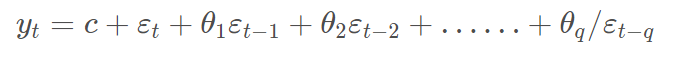

or

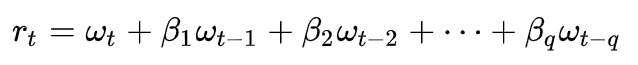

> 对于一阶滑动平均模型，其误差的影响只能保持一个滞后项。

滑动平均模型一定满足平稳性。它的序列均值为 0。它的各间隔k的自相关系数满足：

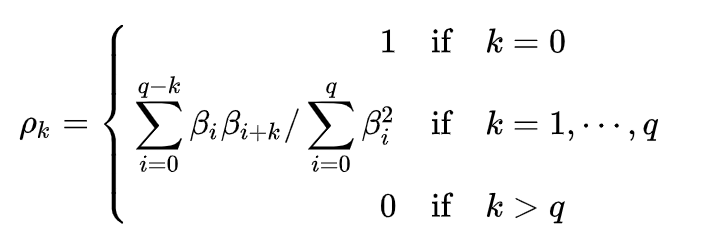

- 自相关系数是p阶截尾
- 偏自相关系数是拖尾

通过ACF图，来优化MA过程的特征，因为MA过程没有季节性和趋势成分，我们只会在ACF 图中得到当前项和滞后项中残差的关系。

#### 代码

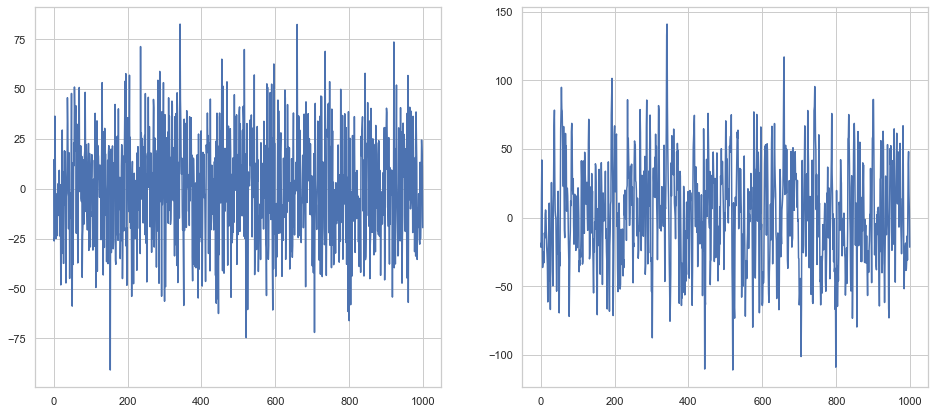

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf


#xma = np.random.randint(1,50000,100)
xma = np.random.normal(0,25,1000)

#lets create a MA series having mean 2 and of order 2
y5 = 2 + xma + 0.8*np.roll(xma,-1) + 0.6*np.roll(xma,-2) #+ 0.6 *np.roll(xma,-3)


plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.subplot(121) 
plt.plot(xma)
plt.subplot(122)
plt.plot(y5)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


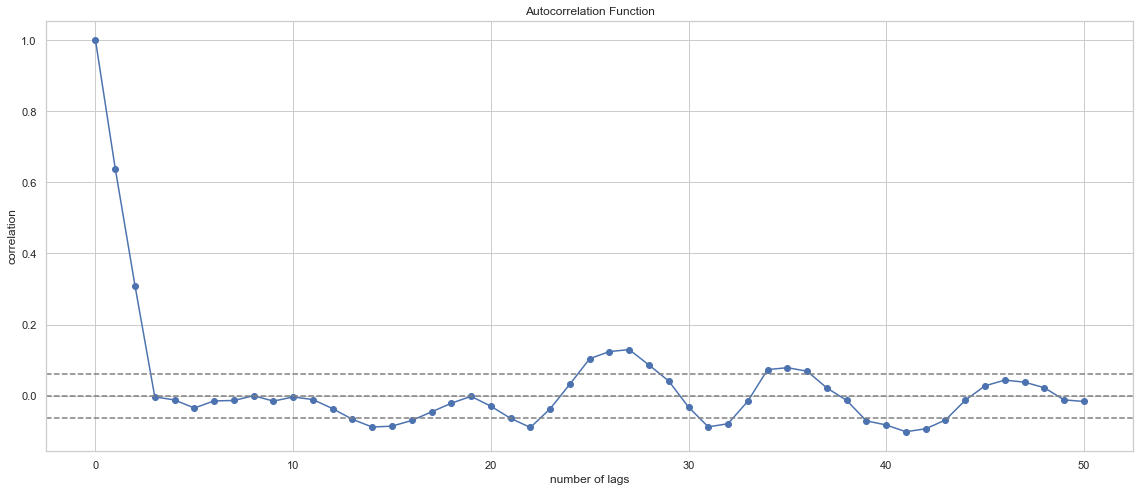

In [7]:
# ACF
# calling acf function from stattools
lag_acf = acf(y5, nlags=50)
plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

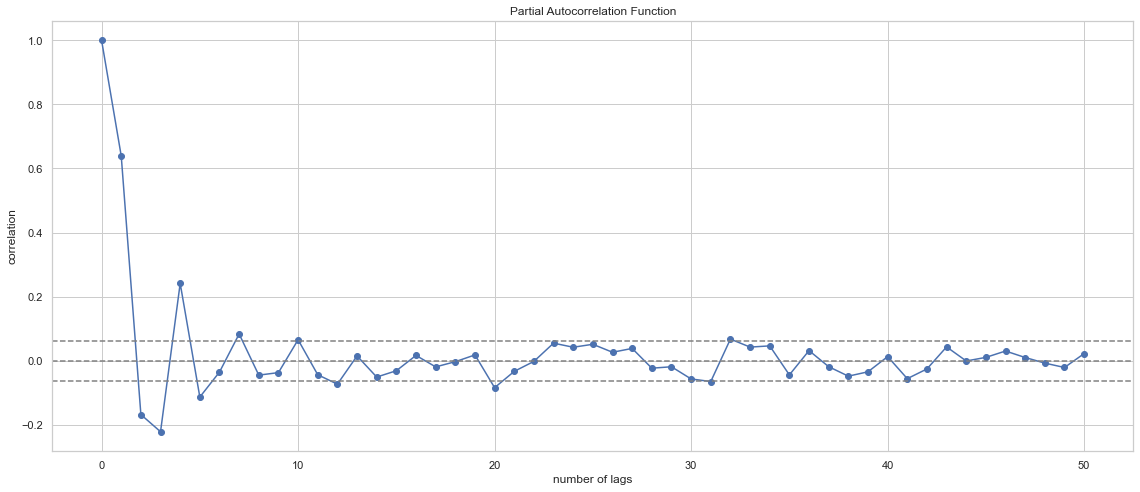

In [8]:
#calling pacf function from stattool
lag_pacf = pacf(y5, nlags=50, method='ols')

#PLOT PACF
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

### ARMA(自回归滑动平均模型)

将一个 p阶的自回归模型和一个q 阶的滑动平均模型组合在一起，便得到了一个阶数为图片的自回归滑动平均模型（ARMA）

- 自相关系数和偏自相关系数都是拖尾的